# MACS 40200
# Problem Set 2
## Yuyao Wu

# (a)

In [4]:
#Question 1
import numpy as np
import scipy.stats as sts
import scipy.special as spec

pts = np.loadtxt('clms.txt')

In [5]:
SamMax = np.amax(pts)
SamMin = np.amin(pts)
SamMean = np.mean(pts)
SamMedian = np.median(pts)
SamStd = np.std(pts)

print ('Maximum =', SamMax)
print ('Minimum =', SamMin)
print ('Mean =', SamMean)
print ('Median =', SamMedian)
print ('Standard Deviation =', SamStd)

Maximum = 227967.25
Minimum = 0.01
Mean = 720.277975327
Median = 172.21
Standard Deviation = 3972.66375639


<IPython.core.display.Javascript object>


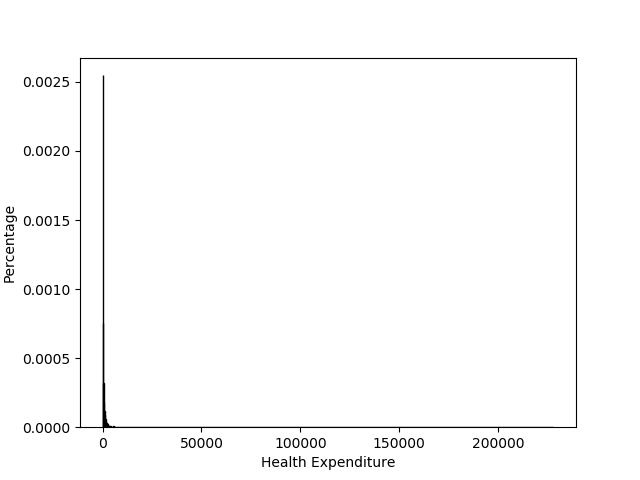

Text(0,0.5,'Percentage')

In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook
count, bins, ignored = plt.hist(pts, 1000, edgecolor='black', normed=True)
plt.xlabel('Health Expenditure')
plt.ylabel('Percentage')

<IPython.core.display.Javascript object>


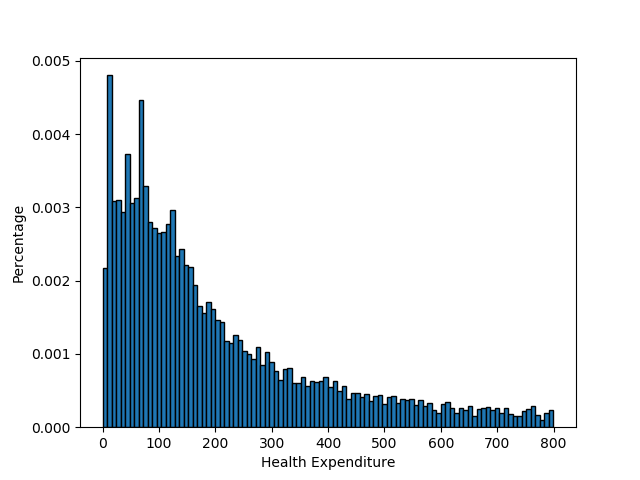

Text(0,0.5,'Percentage')

In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook
ptsres = [x for x in pts if x <= 800]
N = len(ptsres)
weight = np.ones(N)/(8*len(pts))
count, bins, ignored = plt.hist(ptsres, 100, weights = weight, edgecolor='black')
plt.xlabel('Health Expenditure')
plt.ylabel('Percentage')

In [8]:
print ('I prefer the second graph to the first graph since we can see clearer how health expenditure distribute in the second graph than in the first graph.')

I prefer the second graph to the first graph since we can see clearer how health expenditure distribute in the second graph than in the first graph.


# (b)

In [9]:
#Question 2
def gamma_pdf(xvals, alpha, beta):
    pdf_vals = (1/((beta**alpha) * spec.gamma(alpha))) * (xvals**(alpha-1)) * np.exp(-(xvals/beta))
    
    return pdf_vals

def log_lik_gamma(xvals, alpha, beta):
    pdf_vals = gamma_pdf(xvals, alpha, beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

def GAcrit(params, args):
    alpha, beta = params
    xvals = args
    log_lik_val = log_lik_gamma(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

import scipy.optimize as opt

SamVar = np.var(pts)
beta_init = SamVar/SamMean
alpha_init = SamMean/beta_init
params_init = np.array([alpha_init, beta_init])
mle_args = pts
results = opt.minimize(GAcrit, params_init, args=mle_args, method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
alpha_MLE, beta_MLE = results.x
print('alpha_MLE =', alpha_MLE, ' beta_MLE =', beta_MLE)
print('value of maximized log likelihood function =', log_lik_gamma(pts, alpha_MLE, beta_MLE))

alpha_MLE = 0.221755322727  beta_MLE = 21911.0646992
value of maximized log likelihood function = -82076.4516057


<IPython.core.display.Javascript object>


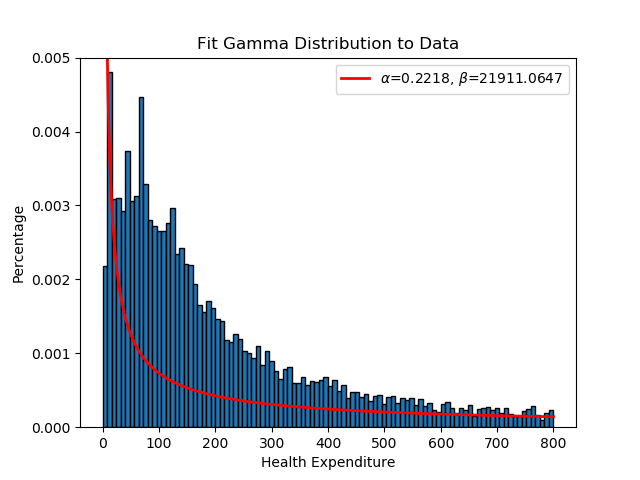

In [10]:
ptsres = [x for x in pts if x <= 800]
count, bins, ignored = plt.hist(ptsres, 100, weights = weight, edgecolor='black')
plt.xlabel('Health Expenditure')
plt.ylabel('Percentage')

dist_pts = np.linspace(1, 800, 1000)
plt.plot(dist_pts, gamma_pdf(dist_pts, alpha_MLE, beta_MLE), linewidth=2, color='r', label= r'$\alpha$=0.2218, $\beta$=21911.0647')
plt.ylim([0,0.005])
plt.title('Fit Gamma Distribution to Data')
plt.legend(loc='upper right')

# (c)

In [11]:
#Question 3
def gengamma_pdf(xvals, alpha, beta, m):
    pdf_vals = (m/((beta**alpha) * spec.gamma(alpha/m))) * (xvals**(alpha-1)) * np.exp(-((xvals/beta)**m))
    
    return pdf_vals

def log_lik_gengamma(xvals, alpha, beta, m):
    pdf_vals = gengamma_pdf(xvals, alpha, beta, m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

def GGcrit(params, args):
    alpha, beta, m = params
    xvals = args
    log_lik_val = log_lik_gengamma(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

beta_init = beta_MLE
alpha_init = alpha_MLE
m_init = 1
params_init = np.array([alpha_init, beta_init, m_init])
mle_args = pts
results = opt.minimize(GGcrit, params_init, args=mle_args, method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None), (1e-10, None)))
gen_alpha_MLE, gen_beta_MLE, gen_m_MLE = results.x
print('gen_alpha_MLE =', gen_alpha_MLE, ' gen_beta_MLE =', gen_beta_MLE, ' gen_m_MLE =', gen_m_MLE)
print('value of maximized log likelihood function =', log_lik_gengamma(pts, gen_alpha_MLE, gen_beta_MLE, gen_m_MLE))

gen_alpha_MLE = 0.221737617595  gen_beta_MLE = 21911.0644318  gen_m_MLE = 0.997091563777
value of maximized log likelihood function = -82076.4467909


<IPython.core.display.Javascript object>


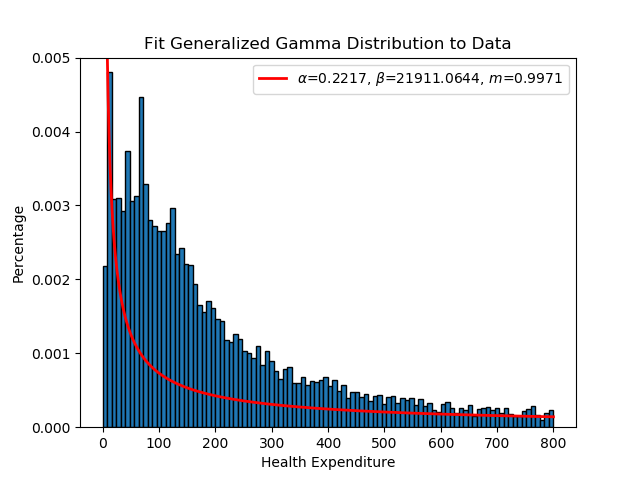

In [12]:
count, bins, ignored = plt.hist(ptsres, 100, weights = weight, edgecolor='black')
plt.xlabel('Health Expenditure')
plt.ylabel('Percentage')

dist_pts = np.linspace(1e-100, 800, 10000)
plt.plot(dist_pts, gengamma_pdf(dist_pts, gen_alpha_MLE, gen_beta_MLE, gen_m_MLE), linewidth=2, color='r', label= r'$\alpha$=0.2217, $\beta$=21911.0644, $m$=0.9971')
plt.ylim([0,0.005])
plt.title('Fit Generalized Gamma Distribution to Data')
plt.legend(loc='upper right')

# (d)

In [13]:
#Question 4
def genbeta2_pdf(xvals, a, b, p, q):
    pdf_vals = (a*(xvals**(a*p-1)))/((b**(a*p)) * spec.beta(p,q) * ((1+((xvals/b)**a))**(p+q)))
    
    return pdf_vals

def log_lik_genbeta2(xvals, a, b, p, q):
    pdf_vals = genbeta2_pdf(xvals, a, b, p, q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

def GB2crit(params, args):
    a, b, p, q = params
    xvals = args
    log_lik_val = log_lik_genbeta2(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val


q_init = 10000
a_init = gen_m_MLE
b_init = (q_init**(1/gen_m_MLE)) * gen_beta_MLE
p_init = gen_alpha_MLE/gen_m_MLE
params_init = np.array([a_init, b_init, p_init, q_init])
mle_args = pts
results = opt.minimize(GB2crit, params_init, args=mle_args, method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None), (1e-10, None), (1e-10, None)))
genbeta2_a_MLE, genbeta2_b_MLE, genbeta2_p_MLE, genbeta2_q_MLE = results.x
print('genbeta2_a_MLE =', genbeta2_a_MLE, ' genbeta2_b_MLE =', genbeta2_b_MLE, ' genbeta2_p_MLE =', genbeta2_p_MLE, ' genbeta2_q_MLE =', genbeta2_q_MLE)
print('value of maximized log likelihood function =', log_lik_genbeta2(pts, genbeta2_a_MLE, genbeta2_b_MLE, genbeta2_p_MLE, genbeta2_q_MLE))

genbeta2_a_MLE = 0.699172363143  genbeta2_b_MLE = 225077019.503  genbeta2_p_MLE = 0.996061454057  genbeta2_q_MLE = 10001.8935816
value of maximized log likelihood function = -76460.0960458


<IPython.core.display.Javascript object>


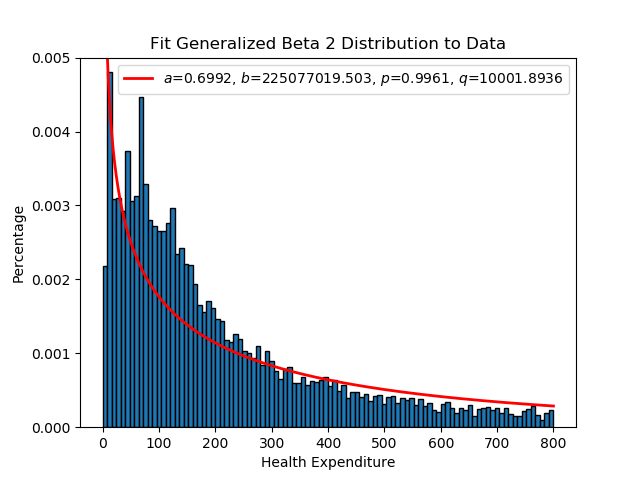

In [14]:
count, bins, ignored = plt.hist(ptsres, 100, weights = weight, edgecolor='black')
plt.xlabel('Health Expenditure')
plt.ylabel('Percentage')

dist_pts = np.linspace(1e-100, 800, 10000)
plt.plot(dist_pts, genbeta2_pdf(dist_pts, genbeta2_a_MLE, genbeta2_b_MLE, genbeta2_p_MLE, genbeta2_q_MLE), linewidth=2, color='r', label= r'$a$=0.6992, $b$=225077019.503, $p$=0.9961, $q$=10001.8936')
plt.ylim([0,0.005])
plt.title('Fit Generalized Beta 2 Distribution to Data')
plt.legend(loc='upper right')

# (e)

In [15]:
#Question 5
#Likelihood Ratio Test for GA against GB2
log_lik_GB2 = log_lik_genbeta2(pts, genbeta2_a_MLE, genbeta2_b_MLE, genbeta2_p_MLE, genbeta2_q_MLE)
log_lik_GA_mle = log_lik_gamma(pts, alpha_MLE, beta_MLE)
LR_GA_val = 2 * (log_lik_GB2 - log_lik_GA_mle)
pval_GA_h0 = 1.0 - sts.chi2.cdf(LR_GA_val, 4)
print('chi squared of H0_GA with 4 degrees of freedom p-value = ', pval_GA_h0, 'and chi squared value from the likelihood ratio test for the estimated GA =', LR_GA_val)

#Likelihood Ratio Test for GG against GB2
log_lik_GG_mle = log_lik_gengamma(pts, gen_alpha_MLE, gen_beta_MLE, gen_m_MLE)
LR_GG_val = 2 * (log_lik_GB2 - log_lik_GG_mle)
pval_GG_h0 = 1.0 - sts.chi2.cdf(LR_GG_val, 4)
print('chi squared of H0_GG with 4 degrees of freedom p-value = ', pval_GG_h0, 'and chi squared value from the likelihood ratio test for the estimated GG =', LR_GG_val)

chi squared of H0_GA with 4 degrees of freedom p-value =  0.0 and chi squared value from the likelihood ratio test for the estimated GA = 11232.7111198
chi squared of H0_GG with 4 degrees of freedom p-value =  0.0 and chi squared value from the likelihood ratio test for the estimated GG = 11232.7014902


# (f)

In [16]:
#Question 6
import scipy.integrate as integral

#Using GB2 as the pdf and integrating it to get the probability
Prob_GB2, Error_GB2 = integral.quad(lambda x: genbeta2_pdf(x, genbeta2_a_MLE, genbeta2_b_MLE, genbeta2_p_MLE, genbeta2_q_MLE), 1000, np.inf)
print ('The probability that the monthly health care claim is more than $1000 under GB2 is', Prob_GB2)

#Using GB2 as the pdf and integrating it to get the probability
Prob_GA, Error_GA = integral.quad(lambda x: gamma_pdf(x, alpha_MLE, beta_MLE), 1000, np.inf)
print ('The probability that the monthly health care claim is more than $1000 under GA is', Prob_GA)

The probability that the monthly health care claim is more than $1000 under GB2 is 0.16253935892464347
The probability that the monthly health care claim is more than $1000 under GA is 0.45195974447843174
